In [1]:
#Follows example of tSNE in scikit learn for MNIST dataset
#http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html

#With extra dimensionality reduction using PCA before tSNE calculation


#Created:       10.03.2016
#Last modified: 11.03.2016 Added decade column to use as labels for plotting tSNE results
#               14.03.2016 Added fn to select a cluster from the scatterplot, display it, and plot corresponding mean SLP

In [1]:
#%pylab inline
%pylab

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
#from matplotlib.pyplot import *
#%matplotlib inline


In [4]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [5]:
#pandas
import pandas as pd
import collections
import os

In [6]:
#FOR SOME REASON, netCDF4 MODULES NO LONGER INSTALLED...
#to read netCDF time
#import netCDF4
#from netCDF4 import num2date, date2num, date2index

In [7]:
#READ IN TIME PRODUCED BY /home/users/cnangini/MIRROR/analogues/get_time.py
dt = pd.DataFrame()
dt = pd.read_csv('/home/nils/data/cathy/time_out.dat',delim_whitespace=True,header=None)
dt.columns = ['Date', 'Time']

#Make 2 new cols for month and year obtained from col[0] date string
dt['Month'] = dt['Date'].str.split('-').str.get(1)  #.astype(int)
dt['Year'] = dt['Date'].str.split('-').str.get(0).astype(int)

dt.head(5)

,Date,Time,Month,Year
0,1948-01-01,00:00:00,01,1948
1,1948-01-02,00:00:00,01,1948
2,1948-01-03,00:00:00,01,1948
3,1948-01-04,00:00:00,01,1948
4,1948-01-05,00:00:00,01,1948


In [8]:
#MAKE A SEASONS COL

#dt['Season'] = np.where(df['Month']=='Z', 'green', 'red')

#http://stackoverflow.com/questions/21733893/pandas-dataframe-add-a-field-based-on-multiple-if-statements
dt.loc[dt['Month'] == '12' ,'Season'] = 1
dt.loc[dt['Month'] == '01' ,'Season'] = 1
dt.loc[dt['Month'] == '02' ,'Season'] = 1
dt.loc[dt['Month'] == '03' ,'Season'] = 2
dt.loc[dt['Month'] == '04' ,'Season'] = 2
dt.loc[dt['Month'] == '05' ,'Season'] = 2
dt.loc[dt['Month'] == '06' ,'Season'] = 3
dt.loc[dt['Month'] == '07' ,'Season'] = 3
dt.loc[dt['Month'] == '08' ,'Season'] = 3
dt.loc[dt['Month'] == '09' ,'Season'] = 4
dt.loc[dt['Month'] == '10' ,'Season'] = 4
dt.loc[dt['Month'] == '11' ,'Season'] = 4

#df['Prediction'] = ((df['Sex']=='female') | ((df['Pclass']==1) & (df['Age']<18))).astype('int')

#dt.head(75)
dt.shape #(24800, 5)


(24800, 5)

In [9]:
#MAKE A COL FOR ARCHIVE PERIOD

dt['archivePeriod'] = np.where(dt['Year'] < 1986, 0, 1)

dt.head(5)
#dt.shape #(24800, 6)

,Date,Time,Month,Year,Season,archivePeriod
0,1948-01-01,00:00:00,01,1948,1.0,0
1,1948-01-02,00:00:00,01,1948,1.0,0
2,1948-01-03,00:00:00,01,1948,1.0,0
3,1948-01-04,00:00:00,01,1948,1.0,0
4,1948-01-05,00:00:00,01,1948,1.0,0


In [10]:
arange(1956,1965).tolist()

[1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964]

In [11]:
#MAKE A COL FOR ARCHIVE DECADE
#Note: not clear how to make conditional statement
#http://stackoverflow.com/questions/23461502/evaluating-pandas-series-values-with-logical-expressions-and-if-statements

dt.loc[dt['Year'] <= 1955 ,'Decade'] = 0
dt.loc[dt['Year'].isin(arange(1956,1966).tolist())  ,'Decade'] = 1
dt.loc[dt['Year'].isin(arange(1966,1976).tolist())  ,'Decade'] = 2
dt.loc[dt['Year'].isin(arange(1976,1986).tolist())  ,'Decade'] = 3
dt.loc[dt['Year'].isin(arange(1986,1996).tolist())  ,'Decade'] = 4
dt.loc[dt['Year'].isin(arange(1996,2006).tolist())  ,'Decade'] = 5
dt.loc[dt['Year'].isin(arange(2006,2016).tolist())  ,'Decade'] = 6

dt.shape #(24800, 7)
dt.iloc[[20000]]
dt.iloc[[12300]]
dt.loc[10000:10010]
dt.tail(10)

,Date,Time,Month,Year,Season,archivePeriod,Decade
24790,2015-11-15,00:00:00,11,2015,4.0,1,6.0
24791,2015-11-16,00:00:00,11,2015,4.0,1,6.0
24792,2015-11-17,00:00:00,11,2015,4.0,1,6.0
24793,2015-11-18,00:00:00,11,2015,4.0,1,6.0
24794,2015-11-19,00:00:00,11,2015,4.0,1,6.0
24795,2015-11-20,00:00:00,11,2015,4.0,1,6.0
24796,2015-11-21,00:00:00,11,2015,4.0,1,6.0
24797,2015-11-22,00:00:00,11,2015,4.0,1,6.0
24798,2015-11-23,00:00:00,11,2015,4.0,1,6.0
24799,2015-11-24,00:00:00,11,2015,4.0,1,6.0


In [12]:
#WRITE SEASON, ARCHIVE PERIOD AND DECADE COLUMNS TO NDARRAY TO USE AS LABELS

season = dt.iloc[:,4].values
season = season.astype(np.int64)
len(season) #24800
season[len(season) - 1]

archivePeriod = dt.iloc[:,5].values
archivePeriod = archivePeriod.astype(np.int64)
len(archivePeriod) #24800
archivePeriod[20000]

decade = dt.iloc[:,6].values
decade = decade.astype(np.int64)
len(decade) #24800
decade[20000]

5

In [13]:
#MAP IMAGE INFO

#Each map is a matrix of 53 LON x 20 LAT
#Full dataset has 53 LON x 20 LAT x 24800 MAPS (1 map per date)

In [14]:
53*20*24800

26288000

In [15]:
53*20

1060

In [17]:
# Create dataframe of SLP data from netCDF file

#File testI8.dat (header manually removed and stored in testI8_header.dat)
# 5,456,000 lines x 5 cols => every 11 lines contain 53 LON values for 1 LAT value. 
# Thus there are 5,456,000/11 = 496,000 LAT values in total, corresponding to 
# 496,000/20 = 24,800 images (or dates)
# Reshape to 24,800 DATE rows x (53*20 = 1060) cols = 26,288,000 values
#Target (labels) file therefore is a 1D array of 24,800 elements

df = pd.DataFrame()
df = pd.read_csv('/home/nils/data/cathy/testI8.dat',delim_whitespace=True,header=None)

In [18]:
df.head(5)

#df.index.name

,0,1,2,3,4
0,101562.0,101610.0,101655.0,101712.0,101762.0
1,101790.0,101810.0,101805.0,101787.0,101770.0
2,101742.0,101700.0,101682.0,101697.0,101680.0
3,101660.0,101695.0,101737.0,101737.0,101760.0
4,101800.0,101785.0,101767.0,101775.0,101732.0


In [19]:
#testI8.dat: 5,456,000 rows x 5 cols
df.shape 

(5456000, 5)

In [20]:
df.shape[0]/(11*20)

24800

In [21]:
#CONVERT TO (numDATE = 24800) x (53 LON * 20 LAT = 1060) MATRIX

row = df.shape[0]/(11*20) #number of dates in dataset (11 lines/lat, 20 lat/date)
col = 53 * 20

#CONVERT DF TO MATRIX AND RESHAPE, OMITTING NaNs
adata = df.values[np.logical_not(np.isnan(df.values))].reshape(row,col)


In [63]:
len(season)

24800

In [23]:
#CONVERT adata FROM NETCDF FILE TO DATAFRAME SO THAT SLP ANOMALIES CAN BE COMPUTED

dA = pd.DataFrame(adata)

#column-wise yearly mean for each dimension: dA.mean(axis=0) #shape (1060,)
#SLP ANOMALY (normalize by mean over entire reference period)

dA_yrAnom = dA.div(dA.mean(axis=0)) #shape (24800, 1060)

dA.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059
0,101562.0,101610.0,101655.0,101712.0,101762.0,101790.0,101810.0,101805.0,101787.0,101770.0,...,100540.0,100607.0,100637.0,100625.0,100585.0,100545.0,100505.0,100487.0,100487.0,100507.0
1,101545.0,101602.0,101632.0,101645.0,101672.0,101715.0,101775.0,101802.0,101812.0,101832.0,...,99840.0,99920.0,99977.0,100027.0,100070.0,100117.0,100185.0,100257.0,100327.0,100390.0
2,101577.0,101577.0,101557.0,101532.0,101527.0,101560.0,101627.0,101682.0,101745.0,101825.0,...,98940.0,98915.0,98867.0,98810.0,98780.0,98792.0,98872.0,99017.0,99210.0,99430.0
3,101665.0,101642.0,101602.0,101557.0,101522.0,101505.0,101522.0,101557.0,101595.0,101657.0,...,99912.0,99842.0,99732.0,99577.0,99397.0,99207.0,99040.0,98920.0,98860.0,98870.0
4,101700.0,101607.0,101532.0,101470.0,101432.0,101425.0,101455.0,101505.0,101565.0,101657.0,...,100375.0,100280.0,100167.0,100017.0,99845.0,99650.0,99445.0,99242.0,99050.0,98880.0


In [24]:
#LOOK AT INDIVIDUAL IMAGES OF RAW SLP

#SLP, RAW, IMAGE 0
img_all = df.values[np.logical_not(np.isnan(df.values))].reshape(row,20,53)
img_all.shape

fig = figure(figsize=(10, 10))
img1 = img_all[0]
title('SLP RAW, IMG 0')
plt.imshow(img1)
plt.colorbar()
plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()


#Correct. Compare with http://webportals.ipsl.jussieu.fr/ScientificApps/dev/forge_cathy/analogues/maps2_run.php?command=fill/line/lev=%28-inf%29%28995,1025,5%29%28inf%29/color=1/pal=mpl_PSU_plasma/key&dateStart=01-JAN-1948&dateEnd=01-JAN-1948

#SLP, RAW, IMAGE 20000
#fig = figure(figsize=(10, 10))
#title('SLP RAW, IMG 20000')
#imgn = img_all[20000]
#plt.imshow(imgn)
#plt.colorbar()
#plt.gca().invert_yaxis()
#plt.show()

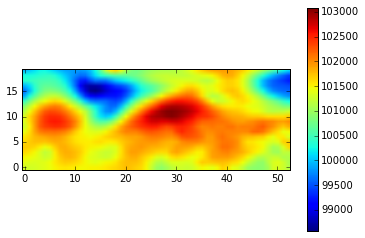

In [25]:
#LOOK AT INDIVIDUAL IMAGES OF SLP ANOMALY (NORMALIZED BY MEAN OVER REF PERIOD)

fig = figure(figsize=(10, 10))
img0 = dA_yrAnom.iloc[0,:].reshape(20,53)
title('SLP YEARLY ANOMALY, IMG 1')
plt.imshow(img0)
plt.colorbar()
plt.gca().invert_yaxis()

fig = figure(figsize=(10, 10))
img0 = dA_yrAnom.iloc[20000,:].reshape(20,53)
title('SLP YEARLY ANOMALY, IMG 20000')
plt.imshow(img0)
plt.colorbar()
plt.gca().invert_yaxis()

In [26]:
#ADD SEASON TO ANOMALY DF TO CALCULATE SEASONAL ANOMALIES

dA['Season'] = season
dA_DJF = dA.loc[dA['Season'] == 1] #shape (6106, 1061)
dA_MAM = dA.loc[dA['Season'] == 2] #shape (6256, 1061)
dA_JJA = dA.loc[dA['Season'] == 3] #shape (6256, 1061)
dA_SON = dA.loc[dA['Season'] == 4] #shape (6182, 1061)

dA_DJF = dA_DJF.drop(['Season'], 1)
dA_MAM = dA_MAM.drop(['Season'], 1)
dA_JJA = dA_JJA.drop(['Season'], 1)
dA_SON = dA_SON.drop(['Season'], 1)

#column-wise seasonal mean for each dimension: dA_DJF.mean(axis=0) #shape (1060,)

#seasonal SLP anomaly
dA_DJFAnom = dA_DJF.div(dA_DJF.mean(axis=0)) #shape (24800, 1060)
dA_MAMAnom = dA_MAM.div(dA_MAM.mean(axis=0)) #shape (24800, 1060)
dA_JJAAnom = dA_JJA.div(dA_JJA.mean(axis=0)) #shape (24800, 1060)
dA_SONAnom = dA_SON.div(dA_SON.mean(axis=0)) #shape (24800, 1060)

dA_JJA.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059
152,101097.0,101172.0,101267.0,101317.0,101332.0,101375.0,101482.0,101575.0,101632.0,101700.0,...,102170.0,102192.0,102207.0,102212.0,102217.0,102222.0,102227.0,102222.0,102207.0,102175.0
153,101177.0,101267.0,101335.0,101360.0,101365.0,101420.0,101535.0,101650.0,101735.0,101817.0,...,101645.0,101667.0,101675.0,101682.0,101685.0,101692.0,101710.0,101745.0,101782.0,101812.0
154,101145.0,101182.0,101247.0,101297.0,101352.0,101440.0,101550.0,101637.0,101720.0,101820.0,...,101487.0,101580.0,101660.0,101725.0,101770.0,101787.0,101795.0,101795.0,101792.0,101782.0
155,101310.0,101352.0,101405.0,101430.0,101442.0,101480.0,101555.0,101622.0,101677.0,101747.0,...,101110.0,101317.0,101520.0,101705.0,101857.0,101977.0,102062.0,102117.0,102147.0,102155.0
156,101370.0,101390.0,101412.0,101435.0,101482.0,101537.0,101592.0,101657.0,101747.0,101845.0,...,100985.0,101050.0,101150.0,101270.0,101415.0,101565.0,101700.0,101815.0,101895.0,101940.0


In [27]:
#LOOK AT INDIVIDUAL IMAGES OF DJF SLP ANOMALY

fig = figure(figsize=(10, 10))
img0 = dA_DJFAnom.iloc[0,:].reshape(20,53)
title('SLP DJF ANOMALY, IMG 1')
plt.imshow(img0)
plt.colorbar()
plt.gca().invert_yaxis()

In [28]:
# Plotting function

def plot_mnist(X, y, X_embedded, name, min_dist=10.0):
    fig = figure(figsize=(10, 10))
    ax = axes(frameon=True)
    subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                    wspace=0.0, hspace=0.0)
    scatter(X_embedded[:, 0], X_embedded[:, 1],
            c=y, marker="x")

In [29]:
#Define arrays for tSNE calculation
#X, y = mnist.data / 255.0, mnist.target #data, labels

X = adata #24800 x 1060
y = season #24800 x 1

In [30]:
# Create subset and reduce to first 50 dimensions using PCA
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
n_train_samples = 5000

X_pca = PCA(n_components=50).fit_transform(X) #shape (6256, 50)
X_train = X_pca[indices[:n_train_samples]] #shape (5000, 50)
y_train = y[indices[:n_train_samples]] #shape (5000,)
y_train_archivePeriod = archivePeriod[indices[:n_train_samples]]
y_train_decade = decade[indices[:n_train_samples]]

In [42]:
#RUN TSNE ON SUBSET OF 5000 PTS
X_train_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_train) #shape (5000, 2)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 6400.609346
[t-SNE] Iteration 25: error = 1.6653107, gradient norm = 0.0094800
[t-SNE] Iteration 50: error = 1.6304889, gradient norm = 0.0054831
[t-SNE] Iteration 75: error = 1.5221460, gradient norm = 0.0018386
[t-SNE] Iteration 100: error = 1.4981953, gradient norm = 0.0015117
[t-SNE] Error after 100 iterations with early exaggeration: 1.498195
[t-SNE] Iteration 125: error = 1.4572191, gradient norm = 0.0011271
[t-SNE] Iteration 150: error = 1.4436326, gradient norm = 0.0010503
[t-SNE] Iteration 175: error = 1.4400251, gradient norm = 0.0010362
[t-SNE] Itera

In [ ]:
#RUN TSNE ON SLP DATA

#Use all datapoints
#NB: do this in ipython, not this notebook!

X_pca = PCA(n_components=50).fit_transform(X)
X_all = X_pca
y_all = season
X_all_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_all)

#plot
plot_mnist(X_all, y_all, X_all_embedded,"t-SNE", min_dist=20.0)

In [59]:
PCA?

In [55]:
X_all

array([[ -7420.7080092 ,  -4305.19141059,  14974.62887328, ...,
          -391.38305061,    437.95008601,    512.46037524],
       [-11816.9267341 ,  -3571.02457268,  18446.99416837, ...,
            43.59252083,    195.53888726,   -694.12622965],
       [-14373.11920892, -13806.26331781,  13346.79338354, ...,
          -135.62699498,   1305.38092886,    625.05674655],
       ..., 
       [  1301.80097621, -11563.32046377, -15686.41235909, ...,
          1205.53925954,   -873.96108598,    641.41276867],
       [-10769.43326729,  -4677.49964874, -18093.52331202, ...,
          1402.00265462,    -27.80190372,    646.57706237],
       [-15999.62146418,  -7938.28753617, -14290.06313911, ...,
          -340.14299184,    301.11507762,   -581.61854008]])

In [58]:
# Save to file
#filename = '/home/nils/data/cathy/tsne_scikitlearn_analogues_allpts.npy'
#np.save(filename, X_all_embedded)

 
# Read from file
X_tsne = np.load(filename) #shape (24800, 2)

plot_mnist(X_all, y_all, X_tsne,"t-SNE", min_dist=20.0)

In [40]:
#RUN TSNE ON YEARLY SLP ANOMALIES
#X_yrAnom = dA_yrAnom.values #24800 x 1060
label_season = season #24800 x 1

#performed in ipython

#### ##########
###  RUN it with kmeans clustering --> sklearn.cluster.KMeans
#### ##########

#X_yrAnom_pca = PCA(n_components=50).fit_transform(X_yrAnom)
#X_yrAnom_tsne = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_yrAnom)


#[t-SNE] Computing pairwise distances...
#[t-SNE] Computing 121 nearest neighbors...
#[t-SNE] Computed conditional probabilities for sample 1000 / 24800
#[t-SNE] Computed conditional probabilities for sample 2000 / 24800
#[t-SNE] Computed conditional probabilities for sample 3000 / 24800
#[t-SNE] Computed conditional probabilities for sample 4000 / 24800
#[t-SNE] Computed conditional probabilities for sample 5000 / 24800
#[t-SNE] Computed conditional probabilities for sample 6000 / 24800
#[t-SNE] Computed conditional probabilities for sample 7000 / 24800
#[t-SNE] Computed conditional probabilities for sample 8000 / 24800
#[t-SNE] Computed conditional probabilities for sample 9000 / 24800
#[t-SNE] Computed conditional probabilities for sample 10000 / 24800
#[t-SNE] Computed conditional probabilities for sample 11000 / 24800
#[t-SNE] Computed conditional probabilities for sample 12000 / 24800
#[t-SNE] Computed conditional probabilities for sample 13000 / 24800
#[t-SNE] Computed conditional probabilities for sample 14000 / 24800
#[t-SNE] Computed conditional probabilities for sample 15000 / 24800
#[t-SNE] Computed conditional probabilities for sample 16000 / 24800
#[t-SNE] Computed conditional probabilities for sample 17000 / 24800
#[t-SNE] Computed conditional probabilities for sample 18000 / 24800
#[t-SNE] Computed conditional probabilities for sample 19000 / 24800
#[t-SNE] Computed conditional probabilities for sample 20000 / 24800
#[t-SNE] Computed conditional probabilities for sample 21000 / 24800
#[t-SNE] Computed conditional probabilities for sample 22000 / 24800
#[t-SNE] Computed conditional probabilities for sample 23000 / 24800
#[t-SNE] Computed conditional probabilities for sample 24000 / 24800
#[t-SNE] Computed conditional probabilities for sample 24800 / 24800
#[t-SNE] Mean sigma: 0.067055
#[t-SNE] Iteration 25: error = 0.8297511, gradient norm = 0.0000106
#[t-SNE] Iteration 25: gradient norm 0.000011. Finished.
#[t-SNE] Iteration 50: error = 0.8297430, gradient norm = 0.0007347
#[t-SNE] Iteration 50: gradient norm 0.000735. Finished.
#[t-SNE] Error after 50 iterations with early exaggeration: 0.829743
#[t-SNE] Iteration 75: error = 0.8283891, gradient norm = 0.0033106
#[t-SNE] Iteration 100: error = 0.8274307, gradient norm = 0.0025482
#[t-SNE] Iteration 125: error = 0.8271999, gradient norm = 0.0024152
#[t-SNE] Iteration 150: error = 0.8271373, gradient norm = 0.0023812
#[t-SNE] Iteration 175: error = 0.8271213, gradient norm = 0.0023721
#[t-SNE] Iteration 200: error = 0.8271173, gradient norm = 0.0023697
#[t-SNE] Iteration 200: error difference 0.000000. Finished.
#[t-SNE] Error after 200 iterations: 0.827117

#filename = '/home/nils/data/cathy/tsne_yrAnom.npy'
#np.save(filename, X_yrAnom_tsne)

# Load TSNE results from file
X_yrAnom_tsne = np.load(filename) #shape (24800, 2)

In [43]:
#PLOT TSNE EMBEDDING, ALL SEASONS
X_yrAnom_tsne = X_train_embedded  

#ALL SEASONS
fig = figure(figsize=(10, 10))
ax = axes(frameon=True) 
title("TSNE with PCA reduction on yearly SLP anomalies")
scatter(X_yrAnom_tsne[:, 0], X_yrAnom_tsne[:, 1], c=label_season, marker="x")
#scatter(X_tsne[:, 0], X_tsne[:, 1], c=season, marker="x") #RAW SLP DATA, NOT ANOMALIES
colorbar(ticks=range(4))
clim(1, 4)
text(5.5, 3.9, "SON", fontsize=12)
text(5.5, 1.3, "JJA", fontsize=12)
text(5.5, -1.4, "MAM", fontsize=12)
text(5.5, -4, "DJF", fontsize=12)

ValueError: Color array must be two-dimensional

In [39]:
#CONVERT TSNE MATRIX TO DATAFRAME SO THAT IT CAN BE FILTERED
#Add Date, Season, archivePeriod and Decade (from dt) as columns fo filtering

dTSNE = pd.DataFrame(X_yrAnom_tsne)  #pd.DataFrame(X_tsne) #RAW SLP
dTSNE['Date'] = dt['Date']
dTSNE['Season'] = dt['Season']
dTSNE['archivePeriod'] = archivePeriod
dTSNE['Decade'] = decade

dTSNE.columns = ['xcoord', 'ycoord', 'Date', 'Season', 'archivePeriod', 'Decade']

dTSNE.head(10)

,xcoord,ycoord,Date,Season,archivePeriod,Decade
0,-0.461965,-0.677101,1948-01-01,1.0,0,0
1,-0.604743,-0.538666,1948-01-02,1.0,0,0
2,-1.105354,-1.144206,1948-01-03,1.0,0,0
3,-1.555567,-0.966212,1948-01-04,1.0,0,0
4,-1.815013,-0.758155,1948-01-05,1.0,0,0
5,-2.139731,-0.294086,1948-01-06,1.0,0,0
6,-2.115170,-0.277215,1948-01-07,1.0,0,0
7,-1.934536,-0.461872,1948-01-08,1.0,0,0
8,-1.138612,-0.821229,1948-01-09,1.0,0,0
9,-0.963943,-0.960517,1948-01-10,1.0,0,0


In [40]:
#ADD COLUMNS TO dA_yrAnom DATFRAME TO ALLOW FILTERING

#VARIOUS LABEL COLUMNS
dA_yrAnom['Date'] = dt['Date']
dA_yrAnom['Season'] = dt['Season']
dA_yrAnom['archivePeriod'] = archivePeriod
dA_yrAnom['Decade'] = decade

#X, Y COORDS OF THE TSNE EMBEDDING SO EVERYTHING IS IN ONE DATAFRAME AND CAN BE FILTERED AS DESIRED
dA_yrAnom['x_TSNE'] = dTSNE['xcoord']
dA_yrAnom['y_TSNE'] = dTSNE['ycoord']

In [188]:
dA_yrAnom.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,1056,1057,1058,1059,Date,Season,archivePeriod,Decade,x_TSNE,y_TSNE
24795,0.998187,0.998329,0.998534,0.998702,0.998660,0.997908,0.996867,0.995707,0.994343,0.993094,...,0.984613,0.985128,0.986255,0.987984,2015-11-20,4,1,6,2.174449,1.346213
24796,0.996986,0.997247,0.997579,0.997865,0.997991,0.997682,0.996995,0.996366,0.995699,0.995078,...,0.990559,0.991548,0.992743,0.994093,2015-11-21,4,1,6,2.275168,1.195308
24797,0.996119,0.996853,0.997481,0.997836,0.998020,0.998105,0.998371,0.998655,0.998646,0.998693,...,0.989647,0.990359,0.991386,0.992687,2015-11-22,4,1,6,2.044314,-0.056447
24798,0.997527,0.997020,0.996693,0.996783,0.997154,0.997485,0.997899,0.998282,0.998371,0.998300,...,0.987814,0.987456,0.987295,0.987409,2015-11-23,4,1,6,0.169110,-1.620654
24799,1.000402,0.999875,0.998780,0.997423,0.996515,0.996285,0.996356,0.996513,0.996534,0.996483,...,0.984861,0.984167,0.983660,0.983281,2015-11-24,4,1,6,0.534276,-0.710061


In [41]:
#PLOT TSNE BY SEASON

#DJF
fig = figure(figsize=(10, 10))
title("TSNE FROM YEARLY ANOMALY, DJF only")
scatter(dTSNE.loc[dTSNE['Season'] == 1].values[:, 0],dTSNE.loc[dTSNE['Season'] == 1].values[:, 1], marker="x")
#savefig("TSNE_DJF.png")

#JJA
fig = figure(figsize=(10, 10))
title("TSNE FROM YEARLY ANOMALY, JJA only")
scatter(dTSNE.loc[dTSNE['Season'] == 3].values[:, 0],dTSNE.loc[dTSNE['Season'] == 3].values[:, 1], marker="x")
#savefig("TSNE_JJA.png")


In [42]:
#PLOTTING FNS 

#PLOT POINTS IN A SPECIFIED BOUNDARY BOX ON THE EMBEDDING PLOT
def plot_cluster(df, xbox, ybox, colour):
    df_cl = df.loc[(df['x_TSNE'] > xbox[0]) & (df['x_TSNE'] < xbox[1]) & (df['y_TSNE'] > ybox[0]) & (df['y_TSNE'] < ybox[1])]
    scatter(df_cl['x_TSNE'], df_cl['y_TSNE'], c=colour)
    #print df_cl


#PLOT MEAN CLUSTER SLP
def plot_clusterSLP(df, xbox, ybox, title1, idx):
    df_cl = df.loc[(df['x_TSNE'] > xbox[0]) & (df['x_TSNE'] < xbox[1]) & (df['y_TSNE'] > ybox[0]) & (df['y_TSNE'] < ybox[1])]
          
    subplot(4,1,idx)
    title(title1)
    plt.imshow(df_cl.drop(['Date', 'Season', 'archivePeriod', 'Decade', 'x_TSNE', 'y_TSNE'], 1).mean().reshape(20,53))
    colorbar()

In [43]:
#PLOT TSNE DJF CLUSTERS
TSNE_DJF = dA_yrAnom.loc[dA['Season'] == 1]

fig = figure(figsize=(10, 10))
title('TSNE FROM YEARLY ANOMALY, DJF')
scatter(TSNE_DJF['x_TSNE'].values, TSNE_DJF['y_TSNE'].values, marker="x")
plot_cluster(TSNE_DJF, [-1.5, -0.5], [-2.4, -1.9], 'r')
plot_cluster(TSNE_DJF, [-2.6, -1.2], [1.8, 2.6], 'g')
plot_cluster(TSNE_DJF, [1.8, 2.7], [0.7, 1.5], 'y')
plot_cluster(TSNE_DJF, [2.1, 3.0], [-0.8, 0.2], 'm')
#outliers
plot_cluster(TSNE_DJF, [-0.5, -0.3], [-3.1, -3.0], 'r') #2 dates: 1980-02-19, 1996-01-15
plot_cluster(TSNE_DJF, [-2.20, -2.10], [-2.60, -2.45], 'y') #4 dates: 1976-01-25, 1989-01-14, 2003-01-30, 2015-01-08

In [44]:
#PLOT TSNE DJF MEAN CLUSTER SLP

fig = figure(figsize=(10, 10))
plot_clusterSLP(TSNE_DJF, [-1.5, -0.5], [-2.4, -1.9], 'Mean DJF SLP, TSNE red cluster', 1)
plot_clusterSLP(TSNE_DJF, [-2.6, -1.2], [1.8, 2.6], 'Mean DJF SLP, TSNE green cluster', 2)
plot_clusterSLP(TSNE_DJF, [1.8, 2.7], [0.7, 1.5], 'Mean DJF SLP, TSNE yellow cluster', 3)
plot_clusterSLP(TSNE_DJF, [2.1, 3.0], [-0.8, 0.2], 'Mean DJF SLP, TSNE magenta cluster', 4)